<a href="https://colab.research.google.com/github/JonasCGN/project_facial_recognition/blob/main/Reconhecimento_Facial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-contrib-python==4.5.5.64

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 MB 7.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.10.0.84
    Uninstalling opencv-contrib-python-4.10.0.84:
      Successfully uninstalled opencv-contrib-python-4.10.0.84


#Visão Computacional: O Guia Completo - Reconhecimento Facial

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os

Mounted at /content/drive


##Carregamento da base de dados

In [3]:
from PIL import Image
import cv2
print(cv2.__version__)
import numpy as np
from google.colab.patches import cv2_imshow

4.5.5


In [4]:
import zipfile
path = '/content/drive/MyDrive/Visao_Computacional_Guia_Completo/Datasets/yalefaces.zip'
zip_objetc = zipfile.ZipFile(file=path, mode='r')
zip_objetc.extractall('./')
zip_objetc.close()

##Pre-processamento das imagens

In [5]:
import os
print(os.listdir('/content/yalefaces/train'))

['subject15.sleepy.gif', 'subject03.sleepy.gif', 'subject12.sad.gif', 'subject15.leftlight.gif', 'subject10.surprised.gif', 'subject15.surprised.gif', 'subject11.centerlight.gif', 'subject07.sleepy.gif', 'subject07.rightlight.gif', 'subject09.sleepy.gif', 'subject09.leftlight.gif', 'subject11.rightlight.gif', 'subject04.happy.gif', 'subject03.centerlight.gif', 'subject01.surprised.gif', 'subject04.wink.gif', 'subject13.noglasses.gif', 'subject12.sleepy.gif', 'subject05.leftlight.gif', 'subject05.rightlight.gif', 'subject04.noglasses.gif', 'subject12.centerlight.gif', 'subject11.leftlight.gif', 'subject01.rightlight.gif', 'subject08.noglasses.gif', 'subject14.wink.gif', 'subject10.rightlight.gif', 'subject13.wink.gif', 'subject09.happy.gif', 'subject14.happy.gif', 'subject04.rightlight.gif', 'subject10.normal.gif', 'subject14.sleepy.gif', 'subject08.sleepy.gif', 'subject01.glasses.gif', 'subject15.happy.gif', 'subject03.surprised.gif', 'subject12.happy.gif', 'subject14.leftlight.gif', '

In [6]:
def get_image_data():
  paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
  #print(paths)
  faces = []
  ids = []
  for path in paths:
    imagem = Image.open(path).convert('L')
    imagem_np = np.array(imagem,'uint8')
    id = int(os.path.split(path)[1].split('.')[0].replace('subject',''))
    ids.append(id)
    faces.append(imagem_np)

  return np.array(ids), faces


In [7]:
ids, faces = get_image_data()

##Treinamento do classificador LBPH

In [8]:
 lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius=4,neighbors=14,grid_x=9,grid_y=9)
 lbph_classifier.train(faces,ids)
 lbph_classifier.write('lbph_classifier.yml')

In [9]:
 lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
 lbph_face_classifier.read('/content/lbph_classifier.yml')

##Reconhecimento de faces

In [10]:
imagem_teste = '/content/yalefaces/test/subject10.sad.gif'


array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 241, 255, 255],
       [255, 255, 255, ..., 234, 237, 252],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)
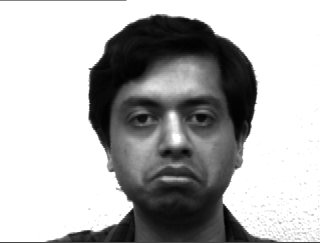

In [11]:
imagem = Image.open(imagem_teste).convert('L')
imagem_np = np.array(imagem, 'uint8')
imagem_np

In [12]:
previsao = lbph_face_classifier.predict(imagem_np)
previsao

(10, 36.84750735484425)

In [13]:
saida_esperada = int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject',''))
saida_esperada

10

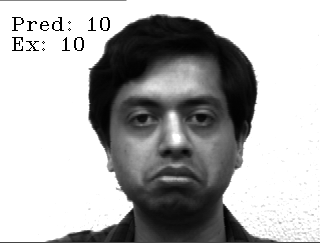

In [14]:
cv2.putText(imagem_np,'Pred: ' + str(previsao[0]),(10,30),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
cv2.putText(imagem_np,'Ex: ' + str(saida_esperada),(10,50),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
cv2_imshow(imagem_np)

##Avaliação do classificador

In [15]:
paths = [os.path.join('/content/yalefaces/test',f) for f in os.listdir('/content/yalefaces/test')]
previsoes = []
saidas_esperadas = []
for path in paths:
  imagem = Image.open(path).convert('L')
  imagem_np = np.array(imagem,'uint8')
  previsao, _ = lbph_face_classifier.predict(imagem_np)
  saida_esperada = int(os.path.split(path)[1].split('.')[0].replace('subject',''))
  previsoes.append(previsao)
  saidas_esperadas.append(saida_esperada)

In [16]:
type(previsoes),type(saidas_esperadas)

(list, list)

In [17]:
previsoes = np.array(previsoes)
saidas_esperadas = np.array(saidas_esperadas)

In [18]:
type(previsoes),type(saidas_esperadas)

(numpy.ndarray, numpy.ndarray)

In [19]:
previsoes

array([ 4, 11,  4,  7,  3, 13,  1, 10, 12,  9,  6,  4,  4, 14,  9,  7,  5,
       11,  3, 12, 14,  4,  5, 13, 14,  4,  8, 12,  7, 15])

In [20]:
saidas_esperadas

array([10, 11,  1, 15,  3, 13,  1, 10, 12,  7,  6,  2,  8,  6,  9,  9,  5,
       11,  3, 12, 14,  4,  5, 13, 14,  4,  8,  2,  7, 15])

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(saidas_esperadas,previsoes)

0.7

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(saidas_esperadas,previsoes)

<Axes: >

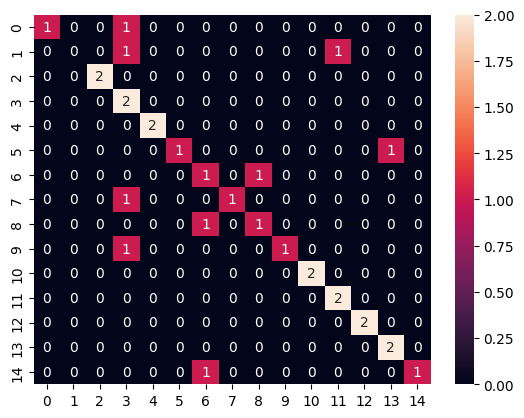

In [23]:
import seaborn
seaborn.heatmap(cm,annot=True)

##DLIB

In [24]:
import dlib

###Detecção de pontos faciais

In [25]:
detector_face = dlib.get_frontal_face_detector()
detector_pontos = dlib.shape_predictor('/content/drive/MyDrive/Visao_Computacional_Guia_Completo/Weights/shape_predictor_68_face_landmarks.dat')

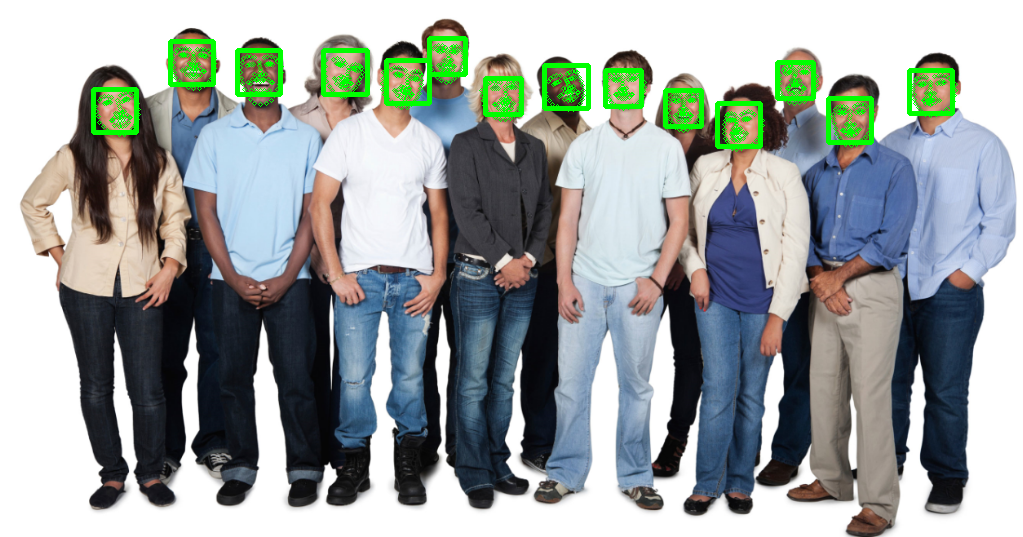

In [26]:
imagem = cv2.imread('/content/drive/MyDrive/Visao_Computacional_Guia_Completo/Images/people2.jpg')
deteccoes = detector_face(imagem,1)

for face in deteccoes:
  pontos = detector_pontos(imagem,face)
  for ponto in pontos.parts():
    cv2.circle(imagem,(ponto.x,ponto.y),2,(0,255,0),1)

  l,t,r,b = face.left(),face.top(),face.right(),face.bottom()
  cv2.rectangle(imagem,(l,t),(r,b),(0,255,0),3)

cv2_imshow(imagem)

###Detecção de descritores faciais

In [27]:
detector_face = dlib.get_frontal_face_detector()
detector_pontos = dlib.shape_predictor('/content/drive/MyDrive/Visao_Computacional_Guia_Completo/Weights/shape_predictor_68_face_landmarks.dat')
descritor_facial_extrator = dlib.face_recognition_model_v1('/content/drive/MyDrive/Visao_Computacional_Guia_Completo/Weights/dlib_face_recognition_resnet_model_v1.dat')

In [28]:
index = {}
idx = 0
descritores_faciais = None

paths = [os.path.join('/content/yalefaces/train',f) for f in os.listdir('/content/yalefaces/train')]
for path in paths:
  #print(path)
  imagem = Image.open(path).convert('RGB')
  imagem_np = np.array(imagem,'uint8')
  deteccoes = detector_face(imagem_np,1)
  for face in deteccoes:
    l,t,r,b = face.left(),face.top(),face.right(),face.bottom()
    cv2.rectangle(imagem_np,(l,t),(r,b),(0,255,0),2)

    pontos = detector_pontos(imagem_np,face)
    for ponto in pontos.parts():
      cv2.circle(imagem_np,(ponto.x,ponto.y),2,(0,0,255),1)

    descritor_facial = descritor_facial_extrator.compute_face_descriptor(imagem_np, pontos)
    descritor_facial = [f for f in descritor_facial]
    descritor_facial = np.asarray(descritor_facial, dtype=np.float64)
    descritor_facial = descritor_facial[np.newaxis, :]

    if descritores_faciais is None:
      descritores_faciais = descritor_facial
    else:
      descritores_faciais = np.concatenate((descritores_faciais,descritor_facial), axis = 0)

    index[idx] = path
    idx += 1

In [30]:
descritores_faciais

array([[-0.14620119,  0.0861488 ,  0.02450142, ..., -0.0266173 ,
         0.0842088 ,  0.08849072],
       [-0.15441076,  0.15364079,  0.07311513, ..., -0.15145504,
         0.14198472,  0.07236396],
       [-0.03716643,  0.115218  ,  0.035211  , ..., -0.07131891,
         0.09786309,  0.00089657],
       ...,
       [-0.11699221,  0.05766138,  0.05908987, ...,  0.04936155,
         0.11356254,  0.04803925],
       [-0.15205733,  0.09503597,  0.01217512, ..., -0.0419237 ,
         0.05299847,  0.07775319],
       [-0.11242457,  0.07253227,  0.08244401, ..., -0.01982772,
         0.07306218,  0.0307594 ]])

In [31]:
index

{0: '/content/yalefaces/train/subject15.sleepy.gif',
 1: '/content/yalefaces/train/subject03.sleepy.gif',
 2: '/content/yalefaces/train/subject12.sad.gif',
 3: '/content/yalefaces/train/subject15.leftlight.gif',
 4: '/content/yalefaces/train/subject10.surprised.gif',
 5: '/content/yalefaces/train/subject15.surprised.gif',
 6: '/content/yalefaces/train/subject11.centerlight.gif',
 7: '/content/yalefaces/train/subject07.sleepy.gif',
 8: '/content/yalefaces/train/subject07.rightlight.gif',
 9: '/content/yalefaces/train/subject09.sleepy.gif',
 10: '/content/yalefaces/train/subject09.leftlight.gif',
 11: '/content/yalefaces/train/subject04.happy.gif',
 12: '/content/yalefaces/train/subject03.centerlight.gif',
 13: '/content/yalefaces/train/subject01.surprised.gif',
 14: '/content/yalefaces/train/subject04.wink.gif',
 15: '/content/yalefaces/train/subject13.noglasses.gif',
 16: '/content/yalefaces/train/subject12.sleepy.gif',
 17: '/content/yalefaces/train/subject05.leftlight.gif',
 18: '/co

###Cálculo da distância entre as faces

In [32]:
descritores_faciais[131]

array([-0.11242457,  0.07253227,  0.08244401, -0.04834708, -0.06398046,
       -0.03341645, -0.05507567, -0.1404047 ,  0.13958888, -0.07938322,
        0.23082037, -0.08975571, -0.19301888, -0.12956139, -0.04053372,
        0.21034864, -0.19076186, -0.13370469, -0.02799688, -0.02302226,
        0.0592222 , -0.01466719,  0.02040226,  0.02795409, -0.1148427 ,
       -0.36872903, -0.10023871, -0.07451332,  0.02170907, -0.0661467 ,
       -0.11451534,  0.05768582, -0.2071116 , -0.04362179, -0.0159895 ,
        0.10216951,  0.03092876, -0.09640124,  0.15660238, -0.01555211,
       -0.2222176 ,  0.00976115,  0.06692488,  0.17082289,  0.21962115,
        0.03722528,  0.02117976, -0.08539145,  0.06259366, -0.1219584 ,
        0.00625438,  0.12606272,  0.02999415,  0.03531673, -0.04703218,
       -0.15931329, -0.03386968,  0.0740785 , -0.10724869, -0.03997604,
        0.0549046 , -0.12104953, -0.08657391, -0.07173409,  0.20503944,
        0.09947069, -0.0954037 , -0.19482604,  0.11392479, -0.15

In [33]:
np.linalg.norm(descritores_faciais[131] - descritores_faciais[131])

0.0

In [34]:
np.linalg.norm(descritores_faciais[131] - descritores_faciais[130])

0.7528662952734254

In [35]:
np.linalg.norm(descritores_faciais[131] - descritores_faciais[129])

0.7209339193691746

In [36]:
np.linalg.norm(descritores_faciais[131] - descritores_faciais[76])

0.353718196029374

In [37]:
np.linalg.norm(descritores_faciais[0] - descritores_faciais[1:],axis=1)

array([0.47364873, 0.64521802, 0.31622035, 0.66638153, 0.30614056,
       0.68117171, 0.64487005, 0.79009389, 0.45756413, 0.54823066,
       0.71247108, 0.52142787, 0.60900832, 0.63748363, 0.57967873,
       0.63458721, 0.54223545, 0.68915981, 0.66306552, 0.7511348 ,
       0.60958346, 0.62627404, 0.68274442, 0.61963047, 0.4922594 ,
       0.59056855, 0.74098496, 0.65612546, 0.61203376, 0.56041591,
       0.65418936, 0.25280027, 0.5470704 , 0.60011047, 0.74344736,
       0.50468643, 0.61892263, 0.64930199, 0.63095753, 0.6044259 ,
       0.65237462, 0.65682675, 0.60147744, 0.64064198, 0.64930199,
       0.63571932, 0.63164029, 0.56111678, 0.5426163 , 0.61508957,
       0.69128963, 0.61873858, 0.58462064, 0.57783652, 0.51921257,
       0.65472153, 0.66039673, 0.57886085, 0.53901859, 0.63186845,
       0.56531949, 0.74104822, 0.45151847, 0.502741  , 0.61181999,
       0.64398499, 0.50468643, 0.70859914, 0.51921257, 0.64900126,
       0.69633194, 0.57057247, 0.64435554, 0.61995617, 0.59903

In [38]:
np.argmin(np.linalg.norm(descritores_faciais[0] - descritores_faciais[1:],axis=1))

108

In [39]:
np.linalg.norm(descritores_faciais[0] - descritores_faciais[1:],axis=1)[108]

0.24896811815895478

###Detecção de faces com Dlib

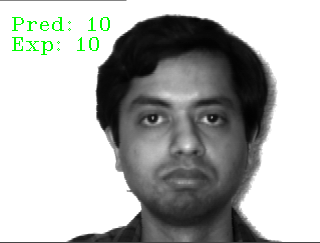

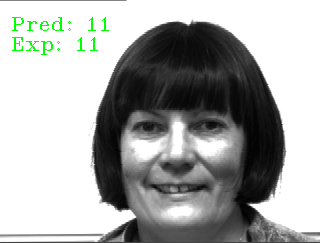

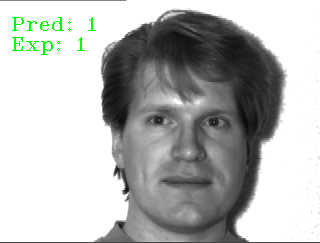

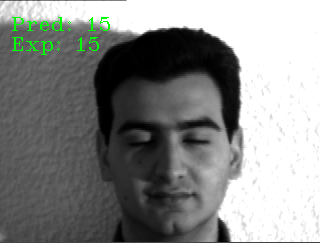

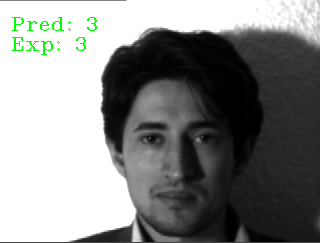

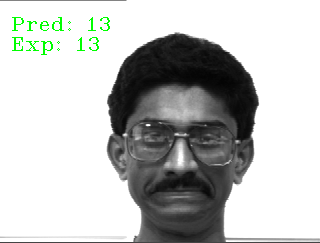

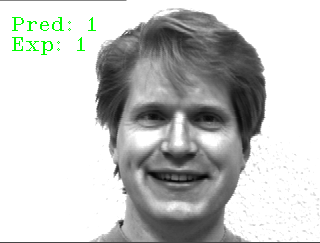

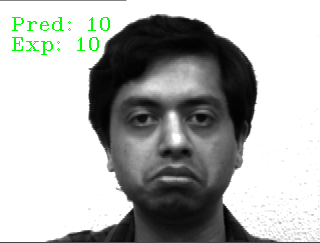

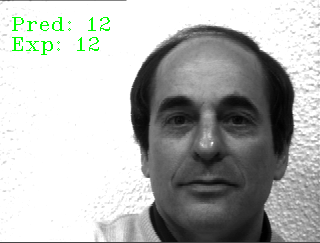

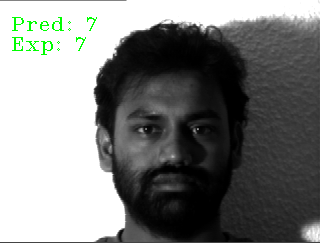

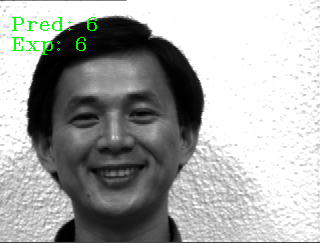

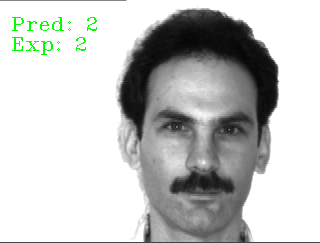

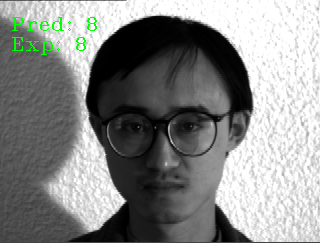

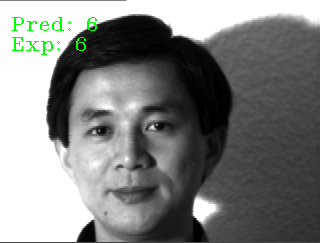

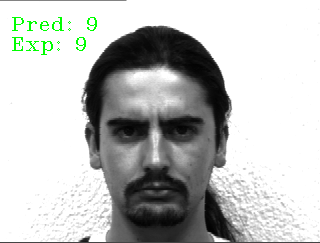

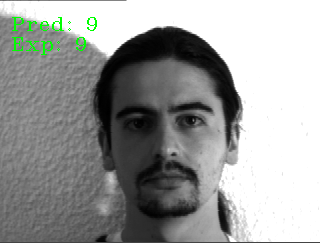

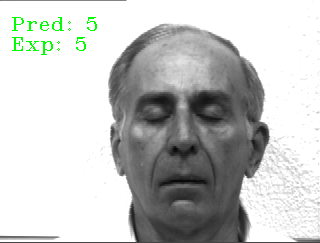

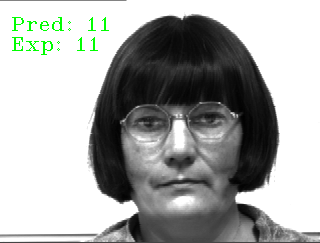

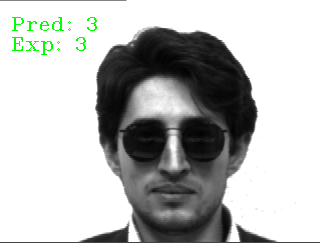

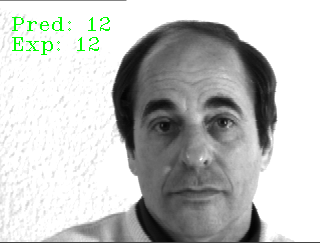

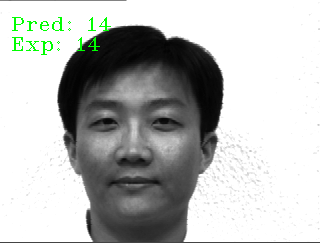

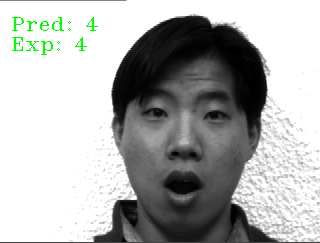

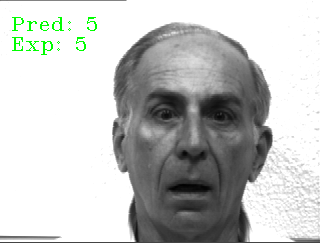

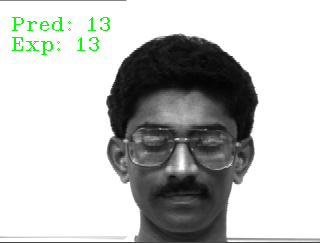

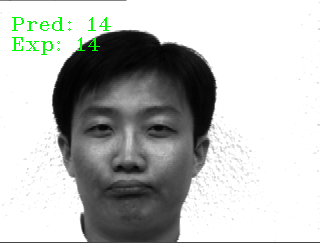

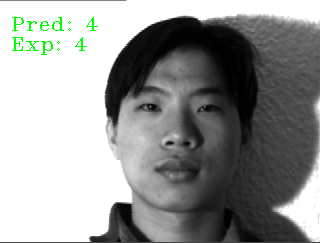

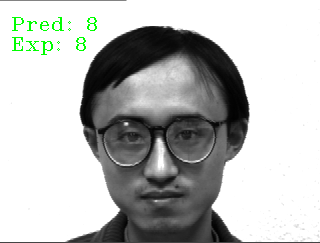

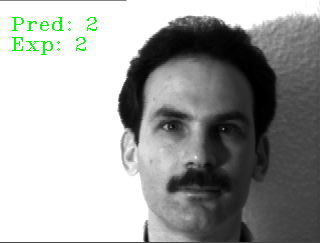

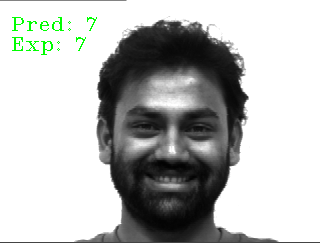

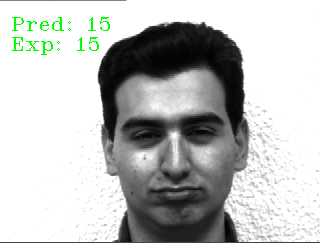

In [40]:
confianca = 0.5
paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]

previsoes = []
saidas_esperadas = []

for path in paths:
  imagem = Image.open(path).convert('RGB')
  imagem_np = np.array(imagem,'uint8')
  deteccoes = detector_face(imagem_np,1)
  for face in deteccoes:
    pontos = detector_pontos(imagem_np, face)
    descritor_facial = descritor_facial_extrator.compute_face_descriptor(imagem_np,pontos)
    descritor_facial = [f for f in descritor_facial]
    descritor_facial = np.asarray(descritor_facial, dtype = np.float64)
    descritor_facial = descritor_facial[np.newaxis,:]

    distancias = np.linalg.norm(descritor_facial - descritores_faciais, axis = 1)
    indice_minimo = np.argmin(distancias)
    distancia_minima = distancias[indice_minimo]
    if distancia_minima <= confianca:
      nome_previsao = int(os.path.split(index[indice_minimo])[1].split('.')[0].replace('subject',''))
    else:
      nome_previsao = 'Face não identificada'

    nome_real = int(os.path.split(path)[1].split('.')[0].replace('subject',''))

    previsoes.append(nome_previsao)
    saidas_esperadas.append(nome_real)

    cv2.putText(imagem_np,'Pred: ' + str(nome_previsao),(10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1,(0,255,0))
    cv2.putText(imagem_np,'Exp: ' + str(nome_real),(10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1,(0,255,0))

  cv2_imshow(imagem_np)

previsoes = np.array(previsoes)
saidas_esperadas = np.array(saidas_esperadas)

In [41]:
previsoes

array([10, 11,  1, 15,  3, 13,  1, 10, 12,  7,  6,  2,  8,  6,  9,  9,  5,
       11,  3, 12, 14,  4,  5, 13, 14,  4,  8,  2,  7, 15])

In [42]:
saidas_esperadas

array([10, 11,  1, 15,  3, 13,  1, 10, 12,  7,  6,  2,  8,  6,  9,  9,  5,
       11,  3, 12, 14,  4,  5, 13, 14,  4,  8,  2,  7, 15])

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(saidas_esperadas, previsoes)

1.0

##Exercício